# Verify a Presentation

## Before running this notebook you should have a mobile wallet contained the credential you issued yourself in Part 3. If not run through [Part 2](http://127.0.0.1:8888/notebooks/Part%202%20-%20Connecting%20Issuer%20Agent%20to%20Sovrin%20Stagingnet.ipynb) and [Part 3](http://localhost:8888/notebooks/Part%203%20-%20Issue%20Credential.ipynb) of this tutorial.

## Note that you do not need to write a public DID to the ledger as a verifier.

## 1. Instatiate Controller for Verifiers's Agent

In [1]:
%autoawait
import time
import asyncio
from termcolor import colored,cprint

from aries_basic_controller.aries_controller import AriesAgentController

WEBHOOK_HOST = "0.0.0.0"
WEBHOOK_PORT = 8062
WEBHOOK_BASE = ""
ADMIN_URL = "http://lead-employer-agent:8061"

# Based on the aca-py agent you wish to control
agent_controller = AriesAgentController(webhook_host=WEBHOOK_HOST, webhook_port=WEBHOOK_PORT,
                                       webhook_base=WEBHOOK_BASE, admin_url=ADMIN_URL)


IPython autoawait is `on`, and set to use `asyncio`


## 2. Register Listeners

The handler should get called every time the controller receives a webhook with the topic present_proof, printing out the payload. The agent calls to this webhook every time it receives a present proof protocol message from another agent. 


In [2]:
loop = asyncio.get_event_loop()
loop.create_task(agent_controller.listen_webhooks())

def connections_handler(payload):
    global STATE
    connection_id = payload["connection_id"]
    print("Connection message", payload, connection_id)
    STATE = payload['state']
    if STATE == 'active':
#         print('Connection {0} changed state to active'.format(connection_id))
        print(colored("Connection {0} changed state to active".format(connection_id), "red", attrs=["bold"]))


connection_listener = {
    "handler": connections_handler,
    "topic": "connections"
}

def proof_handler(payload):
    print("Handle present proof")
    print(payload)

proof_listener = {
    "topic": "present_proof",
    "handler": proof_handler
}

agent_controller.register_listeners([connection_listener,proof_listener], defaults=True)



## 3. Make a connection with the Mobile SSI Wallet you used in [Part 2](http://127.0.0.1:8888/notebooks/Part%202%20-%20Connecting%20Issuer%20Agent%20to%20Sovrin%20Stagingnet.ipynb)

**You should have a credential stored in here from the previous notebook!**

Please download a mobile SSI wallet such as [Connect.me](https://connect.me/), [Trinsic](https://trinsic.id/trinsic-wallet/) or any other Aries compatible wallet.

## 4. Create a connection invitation to scan with the Mobile SSI Wallet

## 4a. Check for any existing connections

In [3]:
# Check for existing connections
connection = await agent_controller.connections.get_connections()
print("EXISTING CONNECTIONS")
for key, value in connection.items():
    for item in value:
        print('ConnectionID:', item['connection_id'], 'Status:',item['state'])

EXISTING CONNECTIONS


## 4b. Create an Invitation

In [4]:
# Create Invitation
invite = await agent_controller.connections.create_invitation()
connection_id = invite["connection_id"]
print("Connection ID", connection_id)
print("Invitation")
print(invite['invitation_url'])
inviteURL = invite['invitation_url']

Connection message {'connection_id': 'b667febb-343c-462c-bcbb-26c809bfb322', 'invitation_mode': 'once', 'routing_state': 'none', 'initiator': 'self', 'accept': 'auto', 'created_at': '2020-09-22 11:03:03.441731Z', 'updated_at': '2020-09-22 11:03:03.441731Z', 'invitation_key': 'ChamEqcmL1Lh8r7oG9A8rkFARMSQHk989KX5b2D7TnAY', 'state': 'invitation'} b667febb-343c-462c-bcbb-26c809bfb322
Connection ID b667febb-343c-462c-bcbb-26c809bfb322
Invitation
https://de4cac5a6fe8.ngrok.io?c_i=eyJAdHlwZSI6ICJkaWQ6c292OkJ6Q2JzTlloTXJqSGlxWkRUVUFTSGc7c3BlYy9jb25uZWN0aW9ucy8xLjAvaW52aXRhdGlvbiIsICJAaWQiOiAiZGE0ZTBiNDAtNDY2MC00NTE3LWI5NWQtODAxMGZlYmIzZWI0IiwgInJlY2lwaWVudEtleXMiOiBbIkNoYW1FcWNtTDFMaDhyN29HOUE4cmtGQVJNU1FIazk4OUtYNWIyRDdUbkFZIl0sICJsYWJlbCI6ICJOSFMgTGVhZCBFbXBsb3llciIsICJzZXJ2aWNlRW5kcG9pbnQiOiAiaHR0cHM6Ly9kZTRjYWM1YTZmZTgubmdyb2suaW8ifQ==


## 4c. Generate QR Code to be scanned with Mobile SSI Wallet

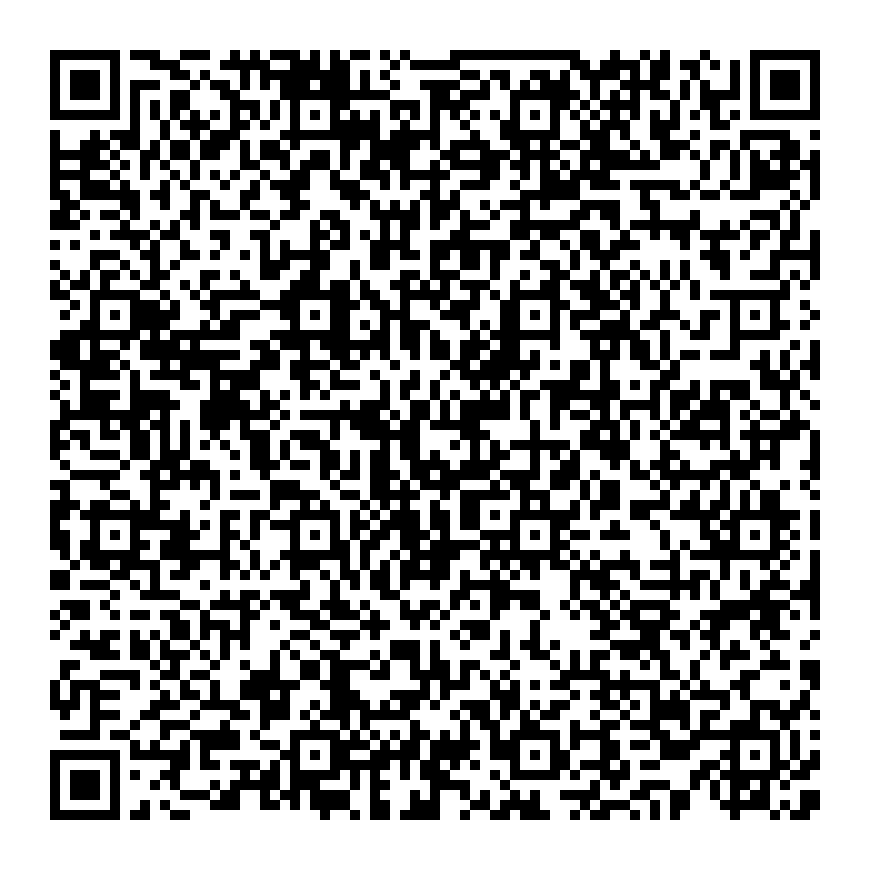

Connection message {'connection_id': 'b667febb-343c-462c-bcbb-26c809bfb322', 'invitation_mode': 'once', 'routing_state': 'none', 'initiator': 'self', 'accept': 'auto', 'created_at': '2020-09-22 11:03:03.441731Z', 'their_label': 'EAX', 'their_did': 'NFVekETc4UadQYVGVu4Cx4', 'updated_at': '2020-09-22 11:03:15.784260Z', 'invitation_key': 'ChamEqcmL1Lh8r7oG9A8rkFARMSQHk989KX5b2D7TnAY', 'state': 'request'} b667febb-343c-462c-bcbb-26c809bfb322
Connection message {'connection_id': 'b667febb-343c-462c-bcbb-26c809bfb322', 'invitation_mode': 'once', 'routing_state': 'none', 'initiator': 'self', 'accept': 'auto', 'created_at': '2020-09-22 11:03:03.441731Z', 'their_label': 'EAX', 'their_did': 'NFVekETc4UadQYVGVu4Cx4', 'updated_at': '2020-09-22 11:03:15.823372Z', 'my_did': '8AA5Ux1Ly5K8x2gSqyh5uT', 'invitation_key': 'ChamEqcmL1Lh8r7oG9A8rkFARMSQHk989KX5b2D7TnAY', 'state': 'response'} b667febb-343c-462c-bcbb-26c809bfb322


In [5]:
import qrcode
# Link for connection invitation
input_data = inviteURL
# Creating an instance of qrcode
qr = qrcode.QRCode(
        version=1,
        box_size=10,
        border=5)
qr.add_data(input_data)
qr.make(fit=True)
img = qr.make_image(fill='black', back_color='white')
img.save('verifier_agent_invite_QRcode.png')

from IPython.display import Image
Image(width=400, filename='./verifier_agent_invite_QRcode.png')

## 4d. Check if established connection is in active state

In [6]:
import time

# print('Current state for ConnectionId {} is {}'.format(connection_id,STATE))
print(colored("Current state for ConnectionId {} is {}".format(connection_id,STATE), "magenta", attrs=["bold"]))
while STATE != 'active':
#     print('ConnectionId {0} is not in active state yet'.format(connection_id))
    print(colored("ConnectionId {0} is not in active state yet".format(connection_id), "yellow", attrs=["bold"]))
    trust_ping = await agent_controller.messaging.trust_ping(connection_id,'hello!')
#     print('Trust ping send to ConnectionId {0} to activate connection'.format(trust_ping))
    print(colored("Trust ping send to ConnectionId {0} to activate connection".format(trust_ping), "blue", attrs=["bold"]))
    time.sleep(5)
    
# print('ConnectionId: {0} is now active. Continue with notebook'.format(connection_id))
print(colored("ConnectionId: {0} is now active. Continue with notebook".format(connection_id), "green", attrs=["bold"]))


Current state for ConnectionId b667febb-343c-462c-bcbb-26c809bfb322 is response
ConnectionId b667febb-343c-462c-bcbb-26c809bfb322 is not in active state yet
Trust ping send to ConnectionId {'thread_id': 'da4a6ce0-3dec-462f-be14-7d9aa7a4ed84'} to activate connection
ConnectionId b667febb-343c-462c-bcbb-26c809bfb322 is not in active state yet
Connection message {'connection_id': 'b667febb-343c-462c-bcbb-26c809bfb322', 'invitation_mode': 'once', 'routing_state': 'none', 'initiator': 'self', 'accept': 'auto', 'created_at': '2020-09-22 11:03:03.441731Z', 'their_label': 'EAX', 'their_did': 'NFVekETc4UadQYVGVu4Cx4', 'updated_at': '2020-09-22 11:03:22.978485Z', 'my_did': '8AA5Ux1Ly5K8x2gSqyh5uT', 'invitation_key': 'ChamEqcmL1Lh8r7oG9A8rkFARMSQHk989KX5b2D7TnAY', 'state': 'active'} b667febb-343c-462c-bcbb-26c809bfb322
Connection b667febb-343c-462c-bcbb-26c809bfb322 changed state to active
Trust ping send to ConnectionId {'thread_id': 'bea7317a-1e90-4604-a7df-6b2507df4b65'} to activate connection

## 5. Request Proof Presentation

## 5a. Generate proof request

In [7]:
print("Request proof of Passport information")

#Set some variables

REVOCATION = False
SELF_ATTESTED = False
EXCHANGE_TRACING = False

req_attrs = [
    {"name": "PSS Given Names", "restrictions": []},
    {"name": "PSS Surname", "restrictions": []},
]

if REVOCATION:
    req_attrs.append(
        {
            "name": "skill",
            "restrictions": [{"schema_id": schema_id}],
            "non_revoked": {"to": int(time.time() - 1)},
        },
    )

if SELF_ATTESTED:
    # test self-attested claims
    req_attrs.append({"name": "country"},)

#Set predicates for Zero Knowledge Proofs
req_preds = []

indy_proof_request = {
    "name": "Proof of Passport Credential",
    "version": "1.0",
    "requested_attributes": {
        f"0_{req_attr['name']}_uuid":
        req_attr for req_attr in req_attrs
    },
    "requested_predicates": {
        f"0_{req_pred['name']}_GE_uuid":
        req_pred for req_pred in req_preds
    },
}

if REVOCATION:
    indy_proof_request["non_revoked"] = {"to": int(time.time())}

#proof_request = indy_proof_request
exchange_tracing_id = EXCHANGE_TRACING
proof_request_web_request = {
    "connection_id": connection_id,
    "proof_request": indy_proof_request,
    "trace": EXCHANGE_TRACING,
}

Request proof of Passport information


### 5b. Send the proof request to Doctor

Doctor is identified through the connection_id

In [15]:
response = await agent_controller.proofs.send_request(proof_request_web_request)
print(response)
presentation_exchange_id = response['presentation_exchange_id']
print("\n")
print(presentation_exchange_id)


{'connection_id': 'b667febb-343c-462c-bcbb-26c809bfb322', 'role': 'verifier', 'auto_present': False, 'initiator': 'self', 'created_at': '2020-09-22 11:07:47.706188Z', 'presentation_request_dict': {'@type': 'did:sov:BzCbsNYhMrjHiqZDTUASHg;spec/present-proof/1.0/request-presentation', '@id': '88507110-b5b1-438c-b0e0-f865add14146', 'request_presentations~attach': [{'@id': 'libindy-request-presentation-0', 'mime-type': 'application/json', 'data': {'base64': 'eyJuYW1lIjogIlByb29mIG9mIFBhc3Nwb3J0IENyZWRlbnRpYWwiLCAidmVyc2lvbiI6ICIxLjAiLCAicmVxdWVzdGVkX2F0dHJpYnV0ZXMiOiB7IjBfUFNTIEdpdmVuIE5hbWVzX3V1aWQiOiB7Im5hbWUiOiAiUFNTIEdpdmVuIE5hbWVzIiwgInJlc3RyaWN0aW9ucyI6IFtdfSwgIjBfUFNTIFN1cm5hbWVfdXVpZCI6IHsibmFtZSI6ICJQU1MgU3VybmFtZSIsICJyZXN0cmljdGlvbnMiOiBbXX19LCAicmVxdWVzdGVkX3ByZWRpY2F0ZXMiOiB7fSwgIm5vbmNlIjogIjYzNjY4NTE4MDUyMTIzMjk5NTA0OTIxNCJ9'}}]}, 'updated_at': '2020-09-22 11:07:47.706188Z', 'thread_id': '88507110-b5b1-438c-b0e0-f865add14146', 'presentation_exchange_id': '9eab1c11-b262-4da2-

## 5c. Verify proof presentation and populate credential template

This is checking the signatures on the credentials presented against the credential schema and definition id stored and resolvable on the ledger. It is a bit of a big complicated object, so we show the common pattern for breaking it down, checking it's verified and accessing the data that has been presented.

In [16]:
verify = await agent_controller.proofs.verify_presentation(presentation_exchange_id)

# print proof request verification status
print('Proof request state verified?: {} '.format(verify['state'] == 'verified'))


Handle present proof
{'connection_id': 'b667febb-343c-462c-bcbb-26c809bfb322', 'role': 'verifier', 'auto_present': False, 'verified': 'true', 'initiator': 'self', 'created_at': '2020-09-22 11:07:47.706188Z', 'presentation_request_dict': {'@type': 'did:sov:BzCbsNYhMrjHiqZDTUASHg;spec/present-proof/1.0/request-presentation', '@id': '88507110-b5b1-438c-b0e0-f865add14146', 'request_presentations~attach': [{'@id': 'libindy-request-presentation-0', 'mime-type': 'application/json', 'data': {'base64': 'eyJuYW1lIjogIlByb29mIG9mIFBhc3Nwb3J0IENyZWRlbnRpYWwiLCAidmVyc2lvbiI6ICIxLjAiLCAicmVxdWVzdGVkX2F0dHJpYnV0ZXMiOiB7IjBfUFNTIEdpdmVuIE5hbWVzX3V1aWQiOiB7Im5hbWUiOiAiUFNTIEdpdmVuIE5hbWVzIiwgInJlc3RyaWN0aW9ucyI6IFtdfSwgIjBfUFNTIFN1cm5hbWVfdXVpZCI6IHsibmFtZSI6ICJQU1MgU3VybmFtZSIsICJyZXN0cmljdGlvbnMiOiBbXX19LCAicmVxdWVzdGVkX3ByZWRpY2F0ZXMiOiB7fSwgIm5vbmNlIjogIjYzNjY4NTE4MDUyMTIzMjk5NTA0OTIxNCJ9'}}]}, 'presentation': {'proof': {'proofs': [{'primary_proof': {'eq_proof': {'revealed_attrs': {'pssgivennames':

In [17]:
# access the revealed attributes and populate credential
credential_attributes = []
for (name, val) in verify['presentation']['requested_proof']['revealed_attrs'].items():
    ## This is the actual data that you want. It's a little hidden
    print('Atribute name: {} Value: {}'.format(name[6:-5],val['raw']))
    credential_attributes.append({"name":name[6:-5], "value": val['raw']})
    
# set credential attribute field names to match credential
credential_attributes[0]['name'] = "RTW Given Names"
credential_attributes[1]['name'] = "RTW Surname"

Atribute name: Surname Value: Jones
Atribute name: Given Names Value: Bob


## End of Tutorial

Be sure to terminate the controller so you can run another tutorial.

In [20]:
response = await agent_controller.terminate()
print(response)

RuntimeError: Site <aiohttp.web_runner.TCPSite object at 0x7f935ec14cd0> is not registered in runner <aiohttp.web_runner.AppRunner object at 0x7f935ebb6890>

## Well done on completing the PyDentity SSI training series!